Load Dataset
Data Pre-processing
Feature Scaling
Split Data
Train Data

Tasks:

1. Train a Logistic Regression model and validate it using a classification report.
2. Train a Decision Tree model and validate it using a classification report.
3. Train a Random Forest model and validate it using a classification report.
4. Compare the models using a confusion matrix and classification report to determine the best-performing model.
5. Perform hyperparameter tuning for each model to improve performance. Use cross_val_score() on X_scaled and y to validate results.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict, StratifiedKFold
from sklearn.feature_selection import RFECV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



pd.set_option('expand_frame_repr', True)

In [2]:
#Load Dataset
# file_path = '/kaggle/input/spark-2025-heart-failure-prediction/train.csv'
file_path = r'C:\Users\Admin\Documents\Data Science\Python\spark\Week 5\train (1).csv'
heart_df = pd.read_csv(file_path)
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           56000 non-null  int64  
 1   age          56000 non-null  int64  
 2   gender       56000 non-null  int64  
 3   height       56000 non-null  int64  
 4   weight       56000 non-null  float64
 5   ap_hi        56000 non-null  int64  
 6   ap_lo        56000 non-null  int64  
 7   cholesterol  56000 non-null  int64  
 8   gluc         56000 non-null  int64  
 9   smoke        56000 non-null  int64  
 10  alco         56000 non-null  int64  
 11  active       56000 non-null  int64  
 12  cardio       56000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 5.6 MB


In [242]:
heart_df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,83327,18995,2,162,83.0,120,80,1,1,0,0,0,1
1,86196,17319,1,158,64.0,120,80,1,1,0,0,1,0


In [16]:
min(heart_df.age)

10859

In [3]:
heart_df = heart_df.drop(columns = 'id', axis = 1)

In [5]:
def custom_theme():
    return {
        'axes.facecolor': 'white',
        'axes.grid': False,
   
        'axes.labelsize': 14,
        'axes.labelweight': 'bold',
        'axes.titlesize': 16,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        
        # Remove spines
        'axes.spines.left': False,
        'axes.spines.right': False,
        'axes.spines.top': False,
        'axes.spines.bottom': True,
        
        # Remove ticks from bottom and left
        'xtick.bottom': False,
        'ytick.left': False,
        
        # Customize tick labels
        'xtick.color': 'grey',
        'ytick.color': 'none',
        'xtick.major.pad': 15,
        'ytick.major.pad': 2,
        
        # Text settings
        'text.color': 'black',
        'font.size': 12,

    }





#### **Exploration**

In [9]:
print(heart_df.columns.to_list(), end = '')

['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

In [62]:
cols = ['gender', 'cholesterol', 'gluc','smoke', 'alco', 'active', 'cardio' ]

for col in cols:
    print(col, heart_df[col].unique())

gender [2 1]
cholesterol [1 2 3]
gluc [1 2 3]
smoke [0 1]
alco [0 1]
active [0 1]
cardio [1 0]


C:\Users\Admin\AppData\Local\Temp\ipykernel_21808\3664208518.py:10: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.catplot(


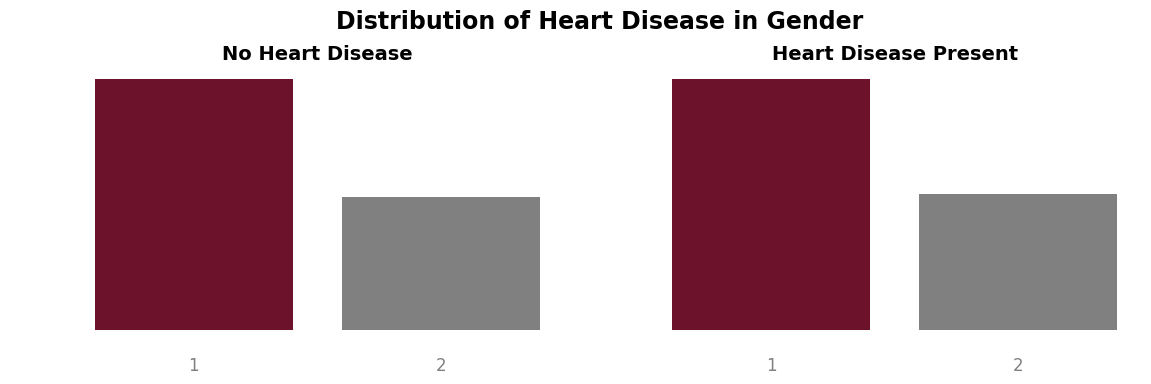

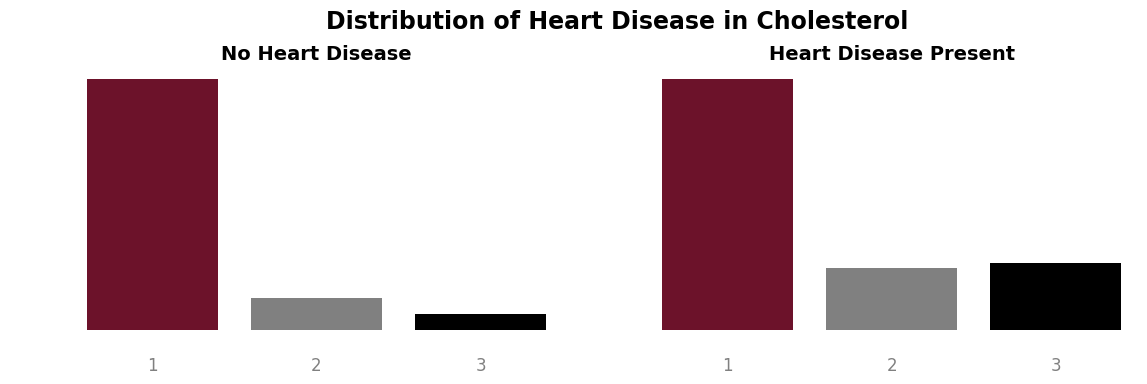

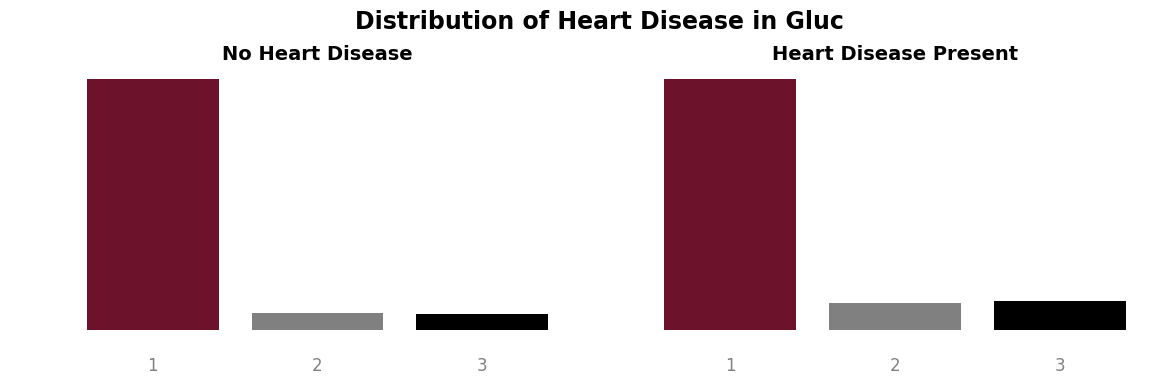

C:\Users\Admin\AppData\Local\Temp\ipykernel_21808\3664208518.py:10: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.catplot(


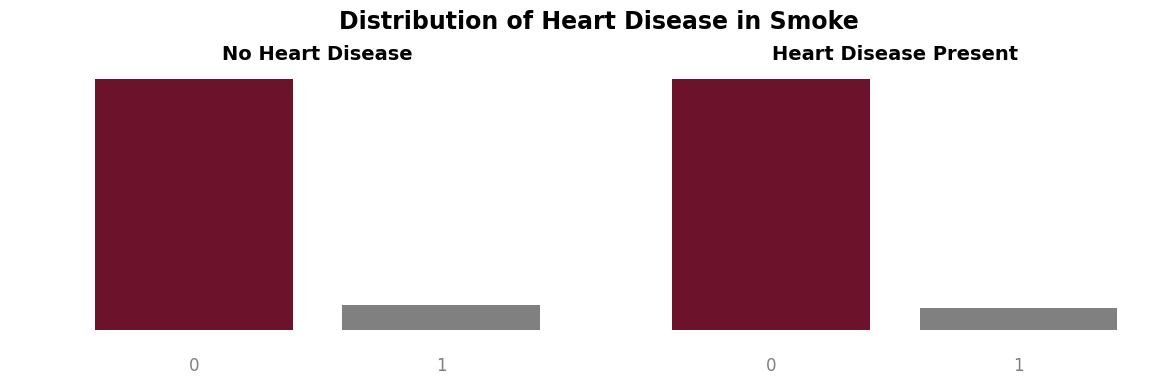

C:\Users\Admin\AppData\Local\Temp\ipykernel_21808\3664208518.py:10: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.catplot(


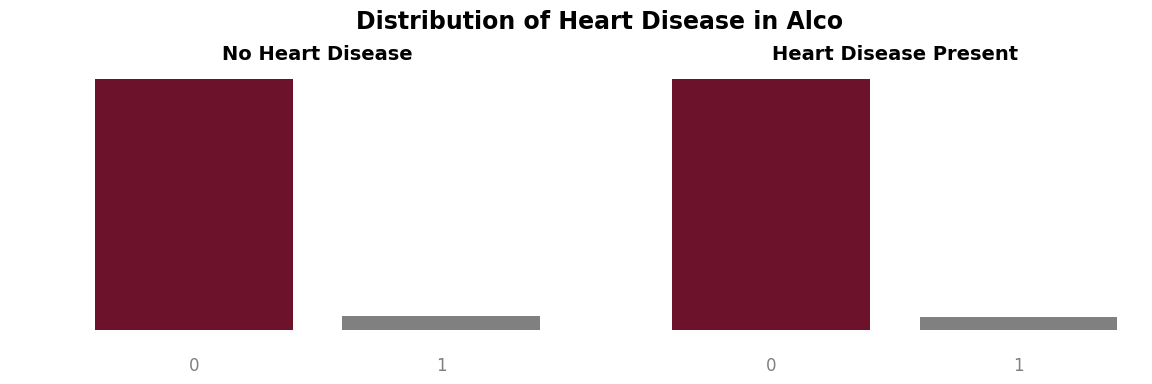

C:\Users\Admin\AppData\Local\Temp\ipykernel_21808\3664208518.py:10: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.catplot(


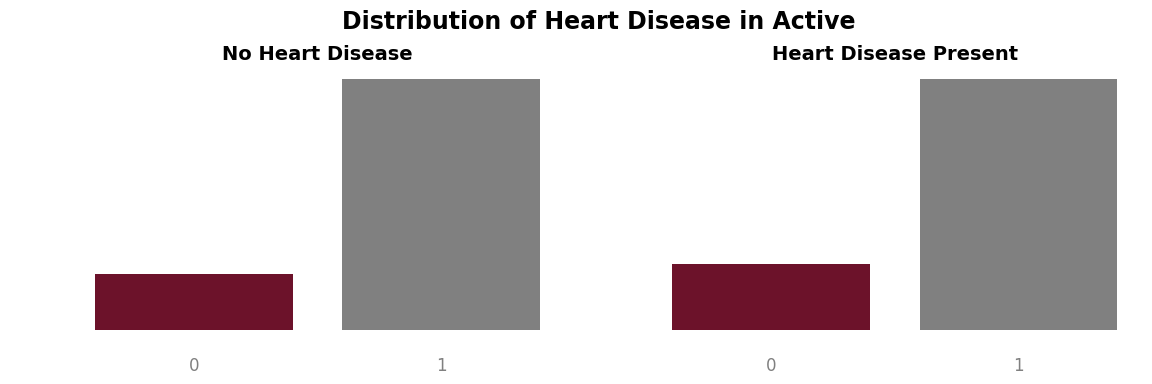

In [ ]:
# Define custom colors
custom_colors = ["#7b0323", "grey", "black"] 


cardio_labels = {0: "No Heart Disease", 1: "Heart Disease Present"}

for col in cols[:-1]:  
    with plt.style.context(custom_theme()):
        
        g = sns.catplot(
            x=col, col='cardio', kind='count', data=heart_df, sharey=False, palette=custom_colors, 
            hue = col, height=4, aspect=1.5
        )

        # Customize each subplot
        for i, ax in enumerate(g.axes.flat):
            ax.set_title(cardio_labels[i], fontsize= 14, fontweight='bold')  # Set title
            ax.set_xlabel("")  
            ax.set_ylabel("")  
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['bottom'].set_visible(False)

        
        g.fig.suptitle(f"Distribution of Heart Disease in {col.title()}", 
                       fontsize= 17, fontweight='bold', y= 1.03) # The vertical difference between header and subtitle 
        
        g._legend.remove()  
        plt.show()

In [6]:
num_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

In [7]:
# Let's try numerical
for i in num_cols:
    print(i, (heart_df[i] < 0).sum())
    

age 0
height 0
weight 0
ap_hi 5
ap_lo 1


BP Can't be Negative

In [8]:
min(heart_df['ap_lo']), min(heart_df['ap_hi'])

(-70, -150)

In [9]:
heart_df[['ap_hi', 'ap_lo']] = heart_df[['ap_hi', 'ap_lo']].abs()

In [6]:
min(heart_df['ap_lo']), min(heart_df['ap_hi'])

(0, 1)

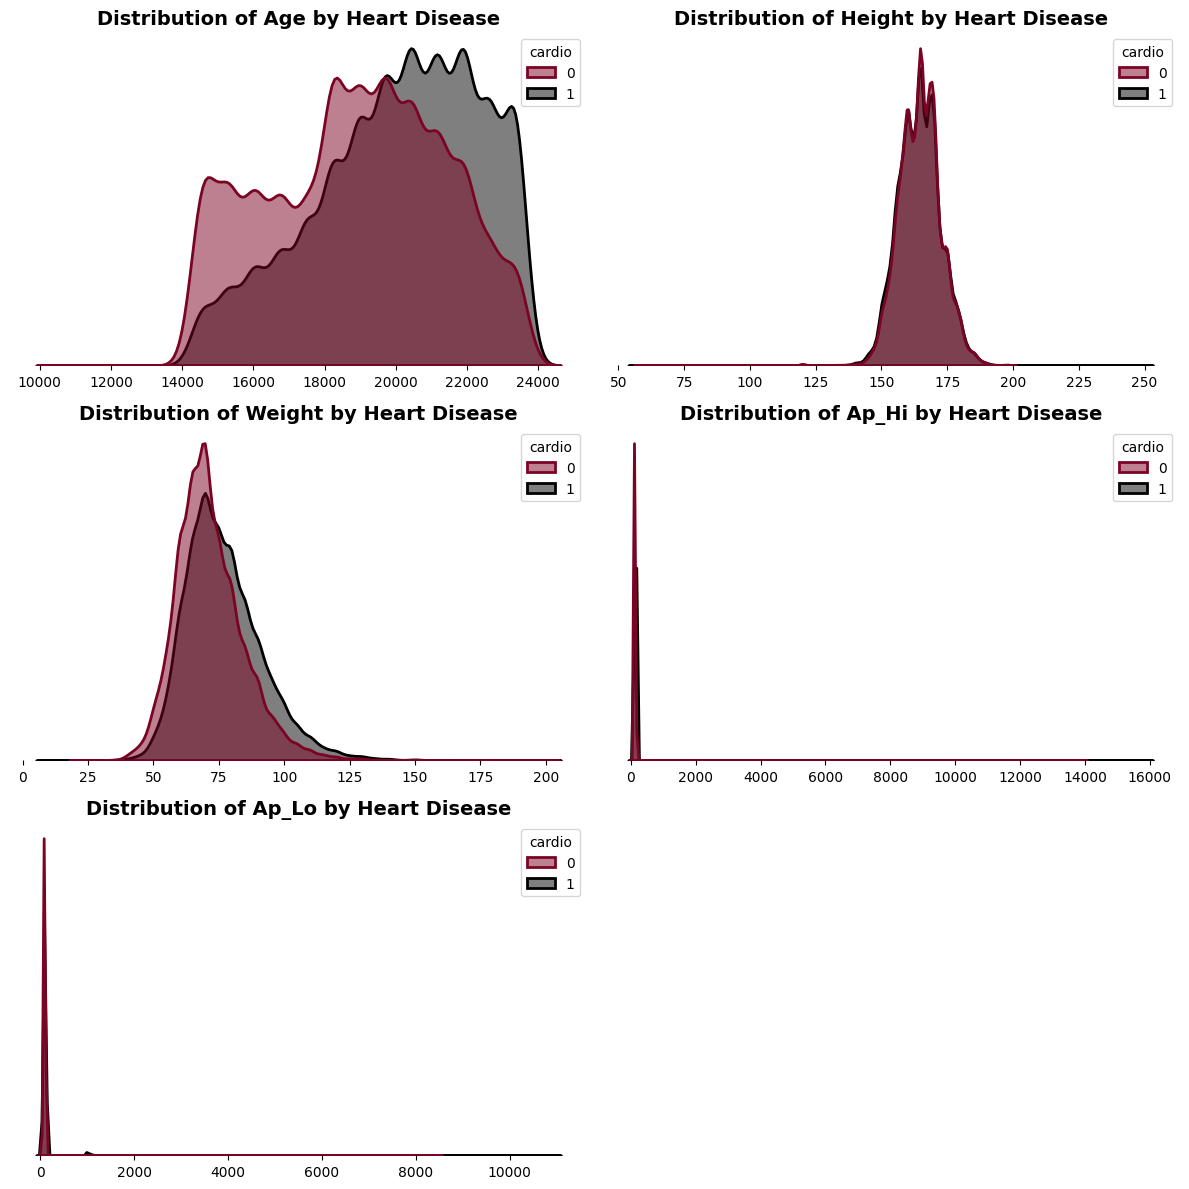

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3 rows, 2 columns
axes = axes.flatten()  # Flatten to loop easily


for i, col in enumerate(num_cols):
    sns.kdeplot(data=heart_df, x=col, hue='cardio', fill=True, 
                common_norm=False, palette= ["#7b0323", "black"] , alpha=0.5, linewidth=2, ax=axes[i])

    
    axes[i].set_title(f"Distribution of {col.title()} by Heart Disease", fontsize=14, fontweight='bold')

    
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_yticks([])

    sns.despine(left=True, bottom=True, ax=axes[i])
    
    # Clear the last plot
    axes[-1].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()

In [7]:
max(heart_df.ap_lo)


11000

We should deal with the outliers though in ap_lo and ap_hi

#### **Feature Engineering**

I think Gender should be One hot encoded to avoid giving bias to a gender

In [11]:
# One-Hot Encoding
heart_df['male'] = (heart_df['gender'] == 2).astype(int)
heart_df['female'] = (heart_df['gender'] == 1).astype(int)


I think we should engineer a BMI column

In [12]:
heart_df['bmi'] = round(heart_df['weight'] / (heart_df['height'] / 100) ** 2 , 2)

The Age Col needs engineering

In [13]:
heart_df["age"] = (heart_df["age"] / 365).astype(int)

In [252]:
heart_df.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,male,female,bmi
0,52,2,162,83.0,120,80,1,1,0,0,0,1,1,0,31.63
1,47,1,158,64.0,120,80,1,1,0,0,1,0,0,1,25.64


In [253]:
round(heart_df.groupby(['cardio'])[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']].mean())

,age,height,weight,ap_hi,ap_lo,bmi
cardio,,,,,,
0,51.0,164.0,72.0,121.0,84.0,27.0
1,54.0,164.0,77.0,137.0,109.0,29.0


#### **Correlation**

In [33]:
print(heart_df.columns.to_list(), end = '')

['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'male', 'female', 'bmi', 'bmi_cat']

In [147]:
cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'cardio']

In [148]:
round(heart_df[cols].corr()['cardio'][:-1] , 2)

age       0.24
height   -0.01
weight    0.18
ap_hi     0.05
ap_lo     0.06
bmi       0.17
Name: cardio, dtype: float64

In [39]:
round(heart_df[cols].corr(),2)

,age,height,weight,ap_hi,ap_lo,bmi,cardio
age,1.00,-0.08,0.05,0.02,0.02,0.08,0.24
height,-0.08,1.00,0.28,0.01,0.01,-0.30,-0.01
weight,0.05,0.28,1.00,0.03,0.04,0.76,0.18
ap_hi,0.02,0.01,0.03,1.00,0.01,0.02,0.05
ap_lo,0.02,0.01,0.04,0.01,1.00,0.03,0.06
bmi,0.08,-0.30,0.76,0.02,0.03,1.00,0.17
cardio,0.24,-0.01,0.18,0.05,0.06,0.17,1.00


I think BMI is a more standardized weight mass distribution to use than weight for modelling. But then Feature Selection Per Model should differ

In [14]:
process_df = heart_df.copy()

In [12]:
process_df.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,male,female,bmi
0,52,2,162,83.0,120,80,1,1,0,0,0,1,1,0,31.63
1,47,1,158,64.0,120,80,1,1,0,0,1,0,0,1,25.64


#### **Outlier and Skewness**

Did you know that treating for skeness in data reduces the IQR range, allowing for more accomodation of data points?

In [15]:
num_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo',  'bmi']


In [132]:
process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          56000 non-null  int64  
 1   gender       56000 non-null  int64  
 2   height       56000 non-null  int64  
 3   weight       56000 non-null  float64
 4   ap_hi        55995 non-null  float64
 5   ap_lo        55999 non-null  float64
 6   cholesterol  56000 non-null  int64  
 7   gluc         56000 non-null  int64  
 8   smoke        56000 non-null  int64  
 9   alco         56000 non-null  int64  
 10  active       56000 non-null  int64  
 11  cardio       56000 non-null  int64  
 12  male         56000 non-null  int64  
 13  female       56000 non-null  int64  
 14  bmi          56000 non-null  float64
 15  bmi_cat      56000 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 6.8 MB


In [14]:
process_df[num_cols].skew()

age       -0.304160
height    -0.704326
weight     1.014394
ap_hi     81.043902
ap_lo     31.884571
bmi        7.849962
dtype: float64

In [16]:
process_df[['bmi', 'ap_hi', 'ap_lo', 'weight']] = np.log1p(process_df[['bmi', 'ap_hi', 'ap_lo', 'weight']])

from scipy.stats import boxcox

process_df['age'], _ = boxcox(process_df['age'] + 1)  # Add 1 to avoid zero values
process_df['height'], _ = boxcox(process_df['height'] + 1)



In [16]:
round(process_df[num_cols].skew())

age      -0.0
height    0.0
weight    0.0
ap_hi    -2.0
ap_lo     6.0
bmi       1.0
dtype: float64

In [17]:
process_df['ap_lo'], _ = boxcox(process_df['ap_lo'] + 1)
process_df['ap_hi'], _ = boxcox(process_df['ap_hi'] + 1)

In [18]:
round(process_df[num_cols].skew())

age      -0.0
height    0.0
weight    0.0
ap_hi     2.0
ap_lo     1.0
bmi       1.0
dtype: float64

Outliers

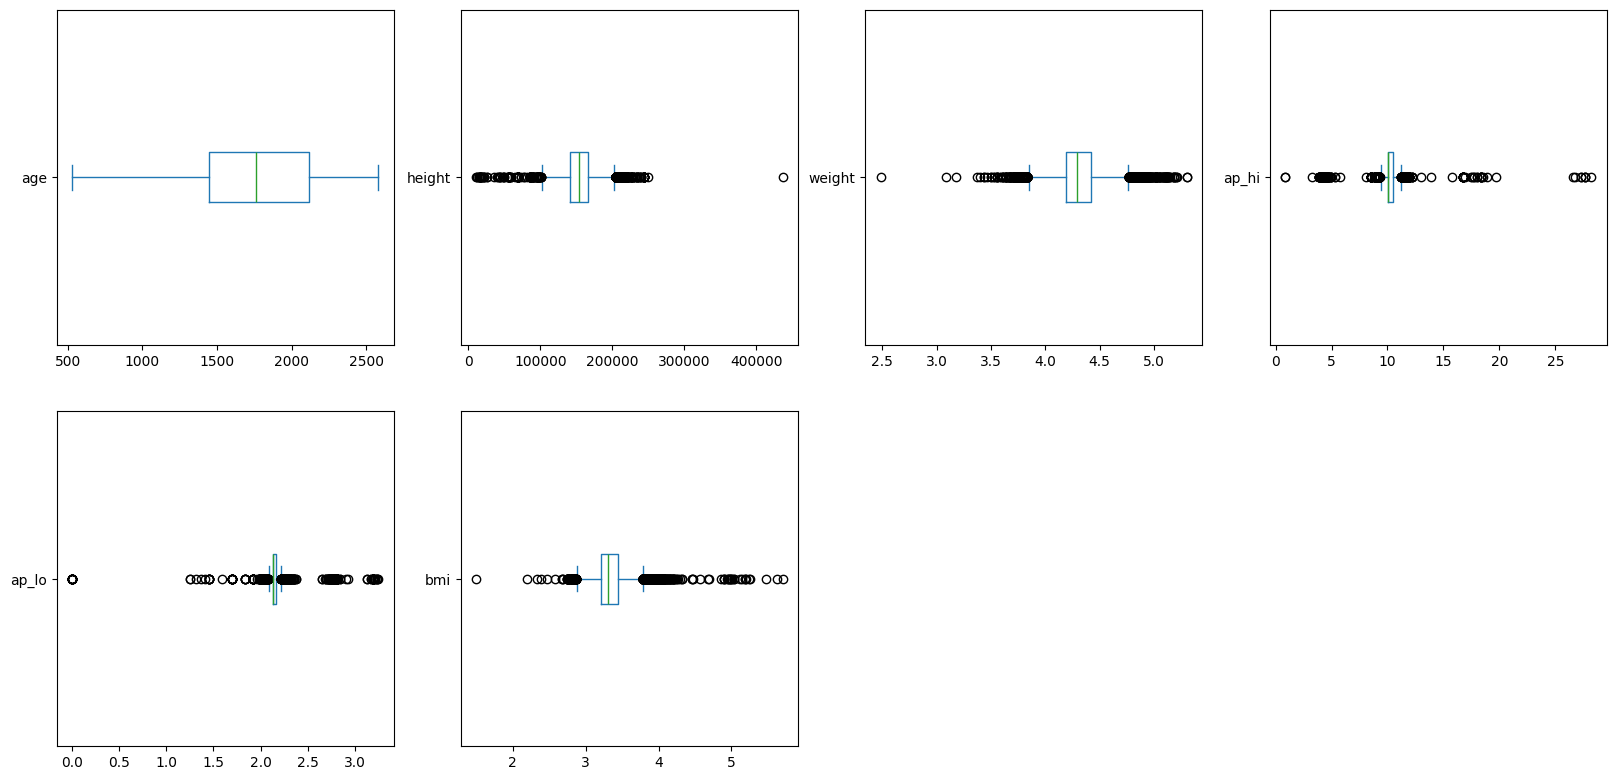

In [270]:
from matplotlib import pyplot


process_df[num_cols].plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, vert = False)


plt.gcf().set_size_inches(20,20)
pyplot.show()

In [18]:
def iqr_trimming(df, cols, factor):
    drop_outliers = np.array([])
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1

        s = df[col]
        upper_limit = q3+ (factor*IQR)
        lower_limit = q1- (factor*IQR)
        indexes= s[(s> upper_limit) | (s < lower_limit)].index
        drop_outliers = np.append(drop_outliers, indexes)

    return drop_outliers

In [19]:
dropped = np.unique(iqr_trimming(process_df, num_cols, 1.5)) #to remove repeated values
dropped

array([4.0000e+00, 6.0000e+00, 1.8000e+01, ..., 5.5932e+04, 5.5941e+04,
       5.5970e+04])

In [20]:
out_df = process_df.drop(dropped)
out_df.shape

(49880, 15)

In [21]:
out_df.reset_index(drop = True)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,male,female,bmi
0,1696.686986,2,147174.926889,4.430817,10.068001,2.133823,1,1,0,0,0,1,1,0,3.485232
1,1384.081207,1,138251.775748,4.174387,10.068001,2.133823,1,1,0,0,1,0,0,1,3.282414
2,1696.686986,1,154089.211128,4.564348,10.936104,2.197338,2,1,0,0,1,1,0,1,3.580459
3,1899.945407,1,151763.180191,4.430817,10.738937,2.197338,1,1,0,0,1,1,0,1,3.461351
4,2264.981335,1,138251.775748,4.430817,10.738937,2.197338,1,1,0,0,1,1,0,1,3.533687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49875,2042.012717,1,154089.211128,3.988984,10.068001,2.115132,1,1,0,0,1,1,0,1,3.018960
49876,2264.981335,2,163607.583219,4.234107,10.068001,2.133823,1,3,0,1,1,0,1,0,3.211247
49877,1830.881548,2,166041.069217,4.317488,10.068001,2.133823,1,1,0,0,0,1,1,0,3.281287
49878,2042.012717,1,163607.583219,4.521789,10.306734,2.167561,1,1,0,0,0,1,0,1,3.492256


### **Modeling**

Actually, I'm not sure we can depend on the EDA to guide feature selection. So let's try other methods


In [ ]:
def preprocess(df : pd.DataFrame, target : str = 'cardio', scale = False):
    X = df.drop(target, axis = 1)
    y = df[target]
    scaler = StandardScaler()
    
    # The correct approach is to split first, then scale
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

#### **1. Logistic Regression**

In [24]:
# Multicolinearity with BMI and weight should be adderessed
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = heart_df[['weight', 'bmi']] 
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


  Feature        VIF
0  weight  48.047169
1     bmi  48.047169


In [23]:
def log(df, cols = ['weight', 'gender', 'male', 'female']):
    log_df = df.drop(cols , axis = 1) 
    X_train, X_test, y_train, y_test = preprocess(log_df)
    lg = LogisticRegression(max_iter = 1000)
    lg.fit(X_train,y_train)
    y_pred = lg.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    # score = lg.score(X_train, y_train)
    return accuracy , y_test , y_pred

In [26]:
log(out_df)[0]

0.73

#### **Random Forest**

In [36]:
def random(df, cols = ['weight', 'gender']):
    rd_df = df.drop(cols, axis = 1)
    X_train, X_test, y_train, y_test = preprocess(rd_df) 


    rf = RandomForestClassifier(n_estimators=500)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    # print(f'Accuracy: {accuracy:.3f}')
    return round(accuracy, 2) , y_test , y_pred
    
    
random(heart_df)[0]


0.71

In [28]:
random(out_df)[0]

0.7

In [79]:

def tree(df ):
    X_train, X_test, y_train, y_test = preprocess( df)
    
    # Create Decision Tree Classifier
    clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)


    # Define stratified 5-fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform Cross-Validation for Different Metrics
    cv_accuracy = cross_val_score(clf, X_train,
                                y_train,
                                cv=cv, scoring='accuracy')


    # Perform cross-validation predictions to get confusion matrix
    y_pred_cv = cross_val_predict(clf, X_train, 
                                  y_train)

    # Compute confusion matrix for Cross-Validation
    conf_matrix_cv = confusion_matrix(y_train
                                      , y_pred_cv)

    # Train the Decision Tree
    clf.fit(X_train , y_train)

    # Predict on Test Data (Unseen Data)
    y_pred_test = clf.predict(X_test)

    (print('Results for Decision Tree Classifier', 
           '-' * 50, sep = '\n'))

    # Print Cross-Validation Results (Training Data)
    print(f"Mean CV Accuracy: {np.mean(cv_accuracy):.4f}")

    # Display Confusion Matrix (Cross-Validation on Training Data)
    print("\nConfusion Matrix (Aggregated from CV Predictions):")
    print(conf_matrix_cv)


    return round(accuracy_score(y_test, y_pred_test), 3) , y_test, y_pred_test



In [26]:
tree(out_df)[0]
# tree(out_df.drop(['weight', 'gender', 'male','female'], axis = 1))[0]
# seems the one I treated for outliers tends to yield lower results in trees

Results for Decision Tree Classifier
--------------------------------------------------
Mean CV Accuracy: 0.7262

Confusion Matrix (Aggregated from CV Predictions):
[[15799  4186]
 [ 6788 13131]]


0.73

In [80]:
tree(process_df.drop(['weight', 'gender', 'male','female'], axis = 1))[0] # Slightly better
# tree(heart_df.drop(['weight', 'gender', 'male','female'], axis = 1))[0] # same  diff


Results for Decision Tree Classifier
--------------------------------------------------
Mean CV Accuracy: 0.7328

Confusion Matrix (Aggregated from CV Predictions):
[[17174  5204]
 [ 6827 15595]]


0.731

Results for Decision Tree Classifier
--------------------------------------------------
Mean CV Accuracy: 0.7328

Confusion Matrix (Aggregated from CV Predictions):
[[17174  5204]
 [ 6827 15595]]
LOGISTIC REGRESSION

--- Classification Report: Logistic Regression ---
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      5035
           1       0.75      0.68      0.71      4941

    accuracy                           0.73      9976
   macro avg       0.73      0.73      0.73      9976
weighted avg       0.73      0.73      0.73      9976

Model Accuracy: 0.73



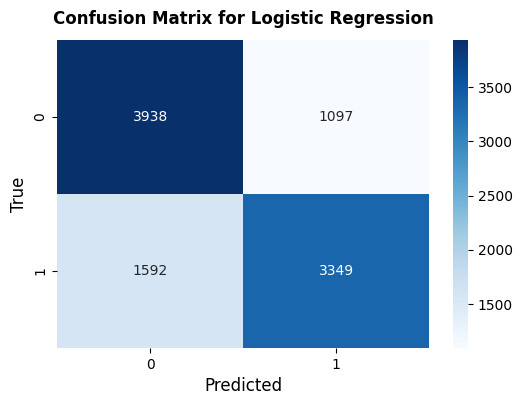

RANDOM FOREST

--- Classification Report: Random Forest ---
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      5639
           1       0.71      0.70      0.71      5561

    accuracy                           0.71     11200
   macro avg       0.71      0.71      0.71     11200
weighted avg       0.71      0.71      0.71     11200

Model Accuracy: 0.71



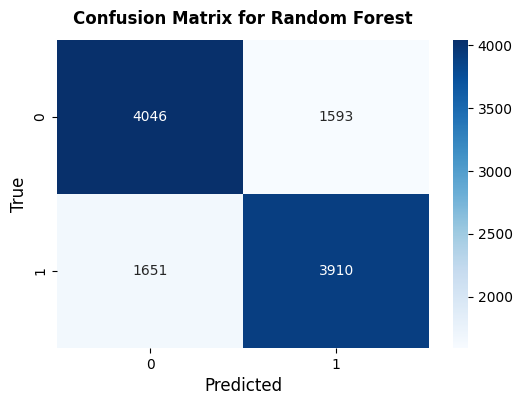

DECISION TREE

--- Classification Report: Decision Tree ---
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      5639
           1       0.75      0.69      0.72      5561

    accuracy                           0.73     11200
   macro avg       0.73      0.73      0.73     11200
weighted avg       0.73      0.73      0.73     11200

Model Accuracy: 0.73



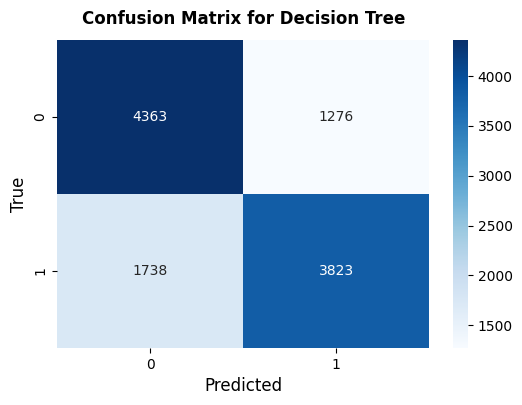

In [29]:
models = {
    'Logistic Regression': log(out_df), 
    'Random Forest': random(heart_df),
    'Decision Tree': tree(process_df.drop(['weight', 'gender', 'male','female'], axis = 1))
}

results = {}
for name,model in models.items():
    print(name.upper())
    print()
    accuracy = model[0]

    results[name] = accuracy
    
    y_true, y_pred = model[1:]  # Unpack the returned values

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
        # Classification report
    print(f"--- Classification Report: {name} ---")
    print(classification_report(y_true, y_pred))

    print(f'Model Accuracy: {results[name]}\n')
    
    
    plt.figure(figsize=(6, 4))
    heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues'
                    , cbar= True)
    plt.xlabel('Predicted', size = 12)
    plt.ylabel('True', size = 12)
    plt.title(f'Confusion Matrix for {name}', weight = 'bold', pad = 15,
                  ha = 'center', va = 'center')
    plt.show()
        
    

Based on Classification Report:

Using F1 and Precision
- Decision Tree
- Logistic Reg
- Random Forest.

In [44]:
results 

{'Logistic Regression': 0.73, 'Random Forest': 0.71, 'Decision Tree': 0.73}

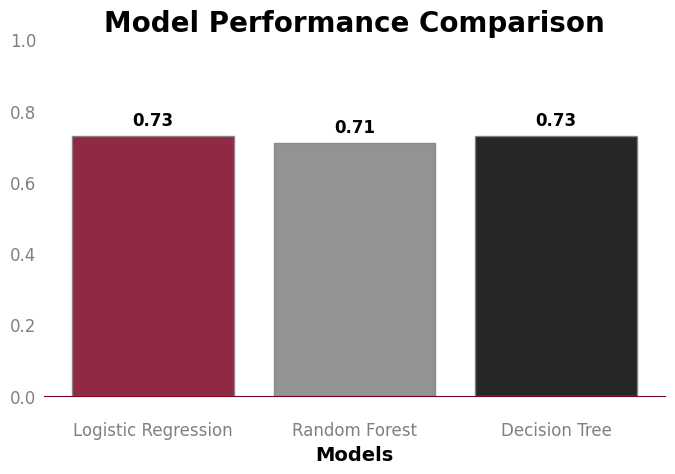

In [63]:


custom_colors = ["#7b0323", "grey", "black"]

with plt.style.context(custom_theme()):
    fig, ax = plt.subplots(figsize=(7, 5)) 

    # Create bar plot with opacity and border
    bars = ax.bar(results.keys(), results.values(), 
                  color=custom_colors, alpha=0.85, edgecolor='gray', linewidth = 1)

    # Annotate bars with accuracy values
    ax.bar_label(bars, fmt='%.2f', padding=5, fontsize=12, color='black', weight='bold')

    # Title and labels
    ax.set_title('Model Performance Comparison', size=20, weight='bold')
    ax.set_xlabel('Models')
    
    ax.set_ylim(0.0, 1.0)

    # Modify spines
    ax.spines['bottom'].set_visible(True)  
    ax.spines['bottom'].set_color("#7b0323")  

    # Ensure ticks are visible
    ax.tick_params(axis='x', colors="grey")  
    ax.tick_params(axis='y', colors="grey")  

    plt.tight_layout()
    plt.show()


### **Hyper Parameter Tuning**

Prediction Accuracy might not change but should be validated by other changes such as F1 and precision using cross_val_scores()

In [116]:
def log_2(df, cols=['weight', 'gender', 'male', 'female']):
    log_df = df.drop(cols, axis=1) 
    X_train, X_test, y_train, y_test = preprocess(log_df)

    # Define hyperparameter grid
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        # 'penalty': ['l1', 'l2'],  # Type of regularization
        # 'solver': ['saga', 'liblinear']  # Compatible solvers
    }

    # Initialize base model
    lg = LogisticRegression(max_iter=1000)

    # Perform Grid Search with Cross-Validation
    grid_search = GridSearchCV(lg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_

    
    print('Results for Logistic Regression: \n')

    #cross validation for Random Forest Classifier
    scoring_metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]


    for metric in scoring_metrics:
        scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring=metric)
        print(f"{metric.upper()} Score: {scores.mean():.4f}")

    print()
    return  best_model


In [117]:
from sklearn.model_selection import RandomizedSearchCV

def tune_random(df, cols=['weight', 'gender']):
    rd_df = df.drop(cols, axis=1)
    X_train, X_test, y_train, y_test = preprocess(rd_df)

    # Define a smaller hyperparameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],  
        'max_depth': [10, 15, None],        
        'min_samples_split': [2, 10],  
        'min_samples_leaf': [1, 4],    
        'max_features': ['sqrt']        
    }

    # Use RandomizedSearchCV instead of GridSearchCV
    rf = RandomForestClassifier()
    search = RandomizedSearchCV(
        rf, param_distributions=param_grid, 
        n_iter=10, cv=3, scoring='accuracy', 
        n_jobs=-1, verbose=1, random_state=42
    )
    
    search.fit(X_train, y_train)

    # Best hyperparameters
    best_params = search.best_params_

    # Train best model
    best_rf = RandomForestClassifier(**best_params)



    print('Results for Random Forest Classifier Model: \n')

    # Cross-validation scores
    scoring_metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]

    for metric in scoring_metrics:
        scores = cross_val_score(best_rf, X_train, y_train, cv=3, scoring=metric)
        print(f"{metric.upper()} Score: {scores.mean():.4f}")

    return best_rf


In [ ]:
def tune_tree(df):
    X_train, X_test, y_train, y_test = preprocess(df)

    # Define hyperparameter grid
    param_grid = {
        'max_depth': [3, 5, 10, 15],  # Tree depth
        'min_samples_split': [2, 5, 10, 20],  # Min samples per split
        'min_samples_leaf': [1, 2, 5, 10],  # Min samples per leaf
        'criterion': ['gini']  # Splitting criterion
    }

    # Stratified 5-fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize Decision Tree Classifier
    clf = DecisionTreeClassifier(random_state=42)

    # Perform GridSearchCV to find the best parameters
    grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_

    # Train the best model
    best_tree = DecisionTreeClassifier(**best_params, random_state=42)


    
    print('Results for Decision Tree Classifier Model: \n')

    # Cross-validation scores
    scoring_metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]

    for metric in scoring_metrics:
        scores = cross_val_score(best_tree, X_train, y_train, cv= cv, scoring=metric)
        print(f"{metric.upper()} Score: {scores.mean():.4f}")


    return  best_tree


In [149]:
dec_df = heart_df.drop(['weight', 'gender', 'male','female'], axis = 1)


In [151]:
tune_tree(dec_df)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Results for Decision Tree Classifier Model: 

ACCURACY Score: 0.7327
PRECISION Score: 0.7618
RECALL Score: 0.6793
F1 Score: 0.7177
ROC_AUC Score: 0.7947


DecisionTreeClassifier(max_depth=5, random_state=42)

In [113]:
# log_2(out_df)[-1], tune_random(heart_df)[-1], tune_tree(dec_df)[-1]



In [111]:
best_model = tune_random(heart_df)[-1]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Results for Random Forest Classifier Model: 

ACCURACY Score: 0.7367
PRECISION Score: 0.7631
RECALL Score: 0.6890
F1 Score: 0.7235
ROC_AUC Score: 0.8029


In [112]:
best_model

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200)

**Cross validate on whole df using best model**

- After selecting the best model, it's okay to perform cross-validation on the whole dataset (X, y).

- This ensures the model generalizes well and prevents overfitting to X_train.

In [152]:
dec_df.columns

Index(['age', 'height', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio', 'bmi'],
      dtype='object')

In [ ]:
from sklearn.pipeline import Pipeline

def evaluate_model_cv(model, df, target = 'cardio', n_splits=5, rfe = False):
    X = df.drop(target, axis=1)
    y = df[target]  
    
    feature_names = X.columns
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    if rfe:
        selector = RFECV(model, step=1, cv=5, scoring="accuracy")  
        X_selected = selector.fit_transform(X, y)  # Fit RFE and transform X
        selected_features = feature_names[selector.support_]  # Get selected feature names
        
        print("\nSelected Features:")
        print(list(selected_features))  
        
        X = X_selected  # Use the transformed data
    
    # Create a pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  
        ('model', model)              
    ])
    
    
    # Cross-validation scores
    scoring_metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]

    for metric in scoring_metrics:
        scores = cross_val_score(pipeline, X, y, cv=skf, scoring= metric)
        
        print(f"{metric.upper()} Score: {scores.mean():.3f}")
        if metric == 'accuracy':
            print(f"Standard Deviation for Accuracy: {np.std(scores):.3f}")
    
    return 



evaluate_model_cv(best_model, dec_df) 

ACCURACY Score: 0.736
PRECISION Score: 0.762
RECALL Score: 0.690
F1 Score: 0.723
ROC_AUC Score: 0.803
Standard Deviation: 0.003


**Try Feature Selection with RFEVC**

In [212]:
evaluate_model_cv(best_model, dec_df, rfe = True) 


Selected Features:
['age', 'height', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'active', 'bmi']
ACCURACY Score: 0.736
PRECISION Score: 0.761
RECALL Score: 0.691
F1 Score: 0.724
ROC_AUC Score: 0.803
Standard Deviation: 0.002


In [143]:
evaluate_model_cv(best_model, heart_df, rfe = True) 


Selected Features:
['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'active', 'male', 'bmi']
Mean Accuracy: 0.736
Standard Deviation: 0.002


Conclusion is that well, the model can work just as good with select features with RFECV.

### **So things to note...,**
- We will work directly with the dec_df
- You can perform adequate feature engineering. 
- Do treat and check for errors to clean eg negative bg or age
- Heart df will not need preprocessing, as our top performer `Random Forest` is robust enough.
- No need to treat outliers, nor skewness


In [199]:
dec_df.columns

Index(['age', 'height', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio', 'bmi'],
      dtype='object')

In [ ]:
X = dec_df.drop(columns = ['cardio'])
y = dec_df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # ✅ FIT scaler on training data
X_test_scaled = scaler.transform(X_test)     


# Train model on selected features
best_model.fit(X_train_scaled, y_train) # Intialized the model


RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200)

In [205]:
def main(file_path = None):
    if file_path is None:
        return
    
    test_data = pd.read_csv(file_path) 
    id = test_data['id']
    test_data = test_data.drop(columns = ["id", 'gender'], axis = 1)
     
    test_data['age'] = test_data['age']/365
    
    
    
    num_col = ['age', 'height','ap_hi', 'ap_lo']
    for i in num_col:
        if (test_data[i] < 0).sum() > 0:
            test_data[i] = test_data[i].abs()
            
    test_data['bmi'] = round(test_data['weight'] / (test_data['height'] / 100) ** 2 , 2)
    test_data = test_data.drop(columns = ["weight"], axis = 1)
    
    return test_data , id

In [206]:
test_df, id = main(r'C:\Users\Admin\Documents\Data Science\Python\spark\Week 5\test.csv')

In [207]:
test_df.columns

Index(['age', 'height', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'bmi'],
      dtype='object')

In [209]:
X_new_scaled = scaler.transform(test_df)  # Use the trained scaler!
predictions = best_model.predict(X_new_scaled)  # Predict using trained model


In [210]:
# Create submission file
submission = pd.DataFrame({"id": id, "target": predictions})
submission

,id,target
0,26681,0
1,58585,1
2,54339,0
3,17273,0
4,25420,0
...,...,...
13995,34457,1
13996,40980,1
13997,83726,1
13998,11086,0


In [211]:
submission.to_csv("submission.csv", index=False)
print("Submission file saved as submission.csv")

Submission file saved as submission.csv
